## Solución numérica del sistema de Lorenz

$$ x_1' = \sigma (x_2-x_1) $$
$$ x_2' = r x_1 -x_2 - x_1 x_3 $$
$$ x_3 = x_1 x_2 -b x_3 $$

In [2]:
# @title Integrador numérico Runge-Kutta de orden 4
import numpy as np
import matplotlib.pylab as plt
from scipy.special import erf
import pandas as pd

def rk4vec(t0, y0, dt, f):
    k1 = f(t0, y0)
    k2 = f(t0 + dt/2.0, y0 + dt * k1 / 2.0)
    k3 = f(t0 + dt/2.0, y0 + dt * k2 / 2.0)
    k4 = f(t0 + dt, y0 + dt * k3)
    y = y0 + (dt/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return y

In [3]:
# @title Clase del modelo de Lorenz
class lorenz_model():

  def __init__(self, init_condition, tmin = 0., tmax = 50., n = 10000, **params):
    self.tmin = tmin
    self.tmax = tmax
    self.n = n
    self.t = np.linspace(self.tmin, self.tmax, self.n)
    self.dt = self.t[1] - self.t[0]
    self.x1 = np.zeros([self.n])
    self.x2 = np.zeros([self.n])
    self.x3 = np.zeros([self.n])
    self.set_params(**params)
    self.init_condition = init_condition 

  def set_params(self, sigma, beta, rho):
    # definición de parametros del modelo
    self.sigma = sigma
    self.beta = beta
    self.rho = rho

  def func(self, t, u):
    #sistema of EDOs
    self.uprime = np.zeros_like(u)
    self.uprime[0] = -self.sigma*(u[0]-u[1])
    self.uprime[1] = self.rho*u[0]-u[1]-u[0]*u[2]
    self.uprime[2] = -self.beta*u[2]+u[0]*u[1]
    return self.uprime

  def run_solver(self):
      # ejecutar solucion por RK4
      self.u0 = np.array(self.init_condition)
      self.u1 = np.zeros_like(self.u0)
      for i in range(self.n):
        self.x1[i] = self.u0[0]
        self.x2[i] = self.u0[1]
        self.x3[i] = self.u0[2]
        self.u1 = rk4vec(self.t[i], self.u0, self.dt, self.func)
        self.u0 = np.copy(self.u1)

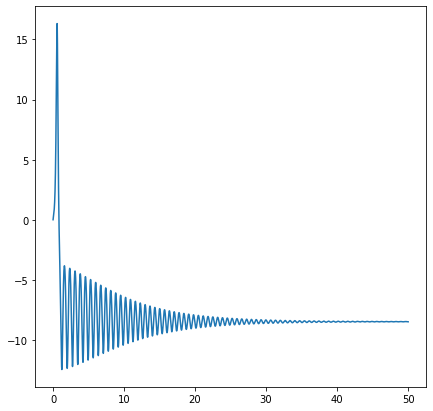

In [4]:
# @title Solución para régimen estable
params = {'sigma': 5, 'beta': 2.667, 'rho': 28}
init_condition = [0, 1, 1.05]
model = lorenz_model(init_condition=init_condition, **params)
model.run_solver()

plt.figure(figsize=(7,7))
plt.plot(model.t, model.x1)
plt.show()

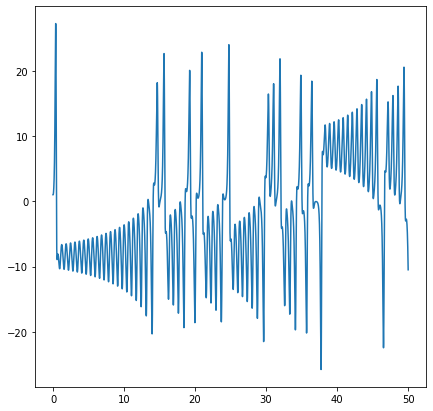

In [5]:
# @title solución para régimen turbulento
params = {'sigma': 10, 'beta': 2.667, 'rho': 28}
init_condition = [0, 1, 1.05]
model = lorenz_model(init_condition=init_condition, **params)
model.run_solver()

plt.figure(figsize=(7,7))
plt.plot(model.t, model.x2)
plt.show()

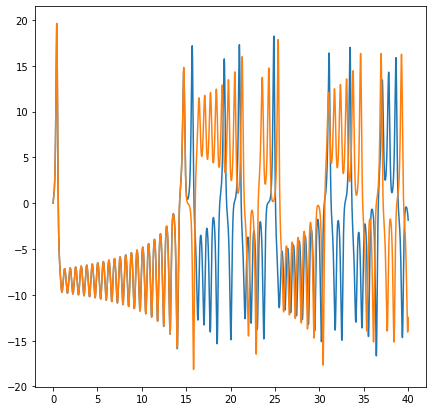

In [6]:
# @title evidencia de Caos !
plt.figure(figsize=(7,7))
init_arr = [[0, 1, 1.05], [0, 1, 1.04]]
for init_vals in init_arr:
    model = lorenz_model(init_condition=init_vals, 
                         tmax=40, 
                         **params)
    model.run_solver()
    plt.plot(model.t, model.x1)

## Opcional : Atractor de Lorenz

¿Que es un atractor Caótico? https://es.wikipedia.org/wiki/Atractor_de_Lorenz

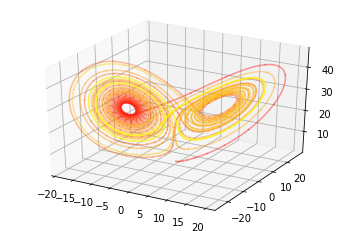

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 10
c = np.linspace(0,1,model.n)
for i in range(0,model.n-s,s):
    ax.plot(model.x1[i:i+s+1], model.x2[i:i+s+1], model.x3[i:i+s+1], color=(1,c[i],0), alpha=0.4)
plt.show()